# Implementación del modelo base

### José Daniel Gómez Cabrera 21429

- Entrenar un modelo inicial con LightGBM utilizando métricas tradicionales como AUC-ROC y F1-score.
- Evaluar el rendimiento inicial en términos de fraude detectado y falsos positivos.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('../data/dataset_feature_engineering.csv', header=0)

In [3]:
df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                        object 
 17  unix_tim

## Años y meses disponibles


In [5]:
print("Años disponibles:", df['year'].unique())
print("Meses disponibles:", df['trans_month'].unique())

Años disponibles: [2019 2020]
Meses disponibles: [ 1  2  3  4  5  6  7  8  9 10 11 12]


## Variable objetivo


In [6]:
fraud_dist = df['is_fraud'].value_counts().rename({0: 'No fraud', 1: 'Fraud'})
fraud_percent = (fraud_dist / fraud_dist.sum()) * 100

fraud_df = pd.DataFrame({
    'Amount': fraud_dist,
    'Percentage': fraud_percent.round(2)
})
fraud_df

,Amount,Percentage
is_fraud,,
No fraud,1842743,99.48
Fraud,9651,0.52


## Modelo 7


Distribución original de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64
Tamaño del conjunto de entrenamiento original: 1481915
Tamaño del conjunto de prueba: 370479
Distribución de clases en el conjunto de entrenamiento original:
is_fraud
0    1474217
1       7698
Name: count, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-19 18:37:41,658] A new study created in memory with name: no-name-4263da56-8aea-4b08-91e4-8fc0d8613030


Distribución de clases después del undersampling en el conjunto de entrenamiento:
is_fraud
0    38490
1     7698
Name: count, dtype: int64
Tamaño del conjunto de entrenamiento después del undersampling: 46188
[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


Early stopping, best iteration is:
[513]	valid_0's auc: 0.996209


[I 2025-05-19 18:37:56,310] Trial 0 finished with value: 877310.5340000001 and parameters: {'num_leaves': 88, 'learning_rate': 0.05624395161027697, 'feature_fraction': 0.8902536045868088, 'min_child_samples': 15, 'scale_pos_weight': 2.204584596150673}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[531]	valid_0's auc: 0.996222


[I 2025-05-19 18:38:12,030] Trial 1 finished with value: 863650.8130000001 and parameters: {'num_leaves': 84, 'learning_rate': 0.04008519493668076, 'feature_fraction': 0.6003994564037625, 'min_child_samples': 80, 'scale_pos_weight': 3.906933829605145}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[965]	valid_0's auc: 0.996064


[I 2025-05-19 18:38:38,125] Trial 2 finished with value: 820801.8789999998 and parameters: {'num_leaves': 78, 'learning_rate': 0.016465824027557845, 'feature_fraction': 0.6463918982260481, 'min_child_samples': 43, 'scale_pos_weight': 7.2908068057228546}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.995211


[I 2025-05-19 18:38:52,965] Trial 3 finished with value: 821632.3640000001 and parameters: {'num_leaves': 23, 'learning_rate': 0.021189795020856005, 'feature_fraction': 0.9204551631727123, 'min_child_samples': 16, 'scale_pos_weight': 2.8228371209588867}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


[I 2025-05-19 18:38:54,293] Trial 4 finished with value: 0.0 and parameters: {'num_leaves': 91, 'learning_rate': 0.010611046962896175, 'feature_fraction': 0.7661499286510994, 'min_child_samples': 73, 'scale_pos_weight': 3.711933630900308}. Best is trial 0 with value: 877310.5340000001.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.991855
[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


Early stopping, best iteration is:
[861]	valid_0's auc: 0.99569


[I 2025-05-19 18:39:07,416] Trial 5 finished with value: 818267.48 and parameters: {'num_leaves': 24, 'learning_rate': 0.047252063931671084, 'feature_fraction': 0.9921937090506022, 'min_child_samples': 35, 'scale_pos_weight': 7.077615724628832}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


[I 2025-05-19 18:39:08,629] Trial 6 finished with value: 833093.0120000001 and parameters: {'num_leaves': 90, 'learning_rate': 0.03240195050525833, 'feature_fraction': 0.736958027945132, 'min_child_samples': 70, 'scale_pos_weight': 6.000902624127967}. Best is trial 0 with value: 877310.5340000001.


Early stopping, best iteration is:
[26]	valid_0's auc: 0.992173
[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


Early stopping, best iteration is:
[869]	valid_0's auc: 0.995896


[I 2025-05-19 18:39:29,234] Trial 7 finished with value: 832287.2659999998 and parameters: {'num_leaves': 64, 'learning_rate': 0.024368635052021522, 'feature_fraction': 0.9915862735580206, 'min_child_samples': 40, 'scale_pos_weight': 6.618443826293151}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[795]	valid_0's auc: 0.995752


[I 2025-05-19 18:39:46,016] Trial 8 finished with value: 867972.09 and parameters: {'num_leaves': 54, 'learning_rate': 0.020857012605909102, 'feature_fraction': 0.9663469180735474, 'min_child_samples': 42, 'scale_pos_weight': 1.4226109366000044}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[521]	valid_0's auc: 0.996242


[I 2025-05-19 18:39:55,547] Trial 9 finished with value: 854921.2380000001 and parameters: {'num_leaves': 38, 'learning_rate': 0.07310823587475102, 'feature_fraction': 0.6901563981317891, 'min_child_samples': 66, 'scale_pos_weight': 4.44139187821672}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[211]	valid_0's auc: 0.996103


[I 2025-05-19 18:40:01,195] Trial 10 finished with value: 827298.5619999999 and parameters: {'num_leaves': 69, 'learning_rate': 0.09627905884204521, 'feature_fraction': 0.8457336031064162, 'min_child_samples': 98, 'scale_pos_weight': 9.212836826253142}. Best is trial 0 with value: 877310.5340000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[461]	valid_0's auc: 0.996051


[I 2025-05-19 18:40:10,558] Trial 11 finished with value: 883123.5860000001 and parameters: {'num_leaves': 50, 'learning_rate': 0.05412490602759539, 'feature_fraction': 0.870106408179755, 'min_child_samples': 11, 'scale_pos_weight': 1.1830324277738093}. Best is trial 11 with value: 883123.5860000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[713]	valid_0's auc: 0.996427


[I 2025-05-19 18:40:24,710] Trial 12 finished with value: 893683.088 and parameters: {'num_leaves': 47, 'learning_rate': 0.0583202601426143, 'feature_fraction': 0.8398055770199007, 'min_child_samples': 13, 'scale_pos_weight': 1.142231603827851}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[456]	valid_0's auc: 0.996102


[I 2025-05-19 18:40:33,727] Trial 13 finished with value: 888532.108 and parameters: {'num_leaves': 48, 'learning_rate': 0.06277095529839895, 'feature_fraction': 0.8309404958774389, 'min_child_samples': 11, 'scale_pos_weight': 1.1017369210852967}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[406]	valid_0's auc: 0.996178


[I 2025-05-19 18:40:41,349] Trial 14 finished with value: 856858.382 and parameters: {'num_leaves': 39, 'learning_rate': 0.07712141939557066, 'feature_fraction': 0.8128563255700365, 'min_child_samples': 26, 'scale_pos_weight': 2.716150199601426}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[419]	valid_0's auc: 0.996137


[I 2025-05-19 18:40:49,370] Trial 15 finished with value: 839371.588 and parameters: {'num_leaves': 41, 'learning_rate': 0.07224921574320287, 'feature_fraction': 0.7964593173990697, 'min_child_samples': 28, 'scale_pos_weight': 5.169245415055988}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[458]	valid_0's auc: 0.995845


[I 2025-05-19 18:40:59,409] Trial 16 finished with value: 863981.959 and parameters: {'num_leaves': 53, 'learning_rate': 0.03967986729069371, 'feature_fraction': 0.9197645603882219, 'min_child_samples': 55, 'scale_pos_weight': 1.804683800599732}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[361]	valid_0's auc: 0.995757


[I 2025-05-19 18:41:05,570] Trial 17 finished with value: 806333.3310000001 and parameters: {'num_leaves': 30, 'learning_rate': 0.09094668476439399, 'feature_fraction': 0.7215459577409922, 'min_child_samples': 25, 'scale_pos_weight': 9.722301657791741}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[396]	valid_0's auc: 0.996164


[I 2025-05-19 18:41:15,404] Trial 18 finished with value: 862106.4299999999 and parameters: {'num_leaves': 70, 'learning_rate': 0.06046382776732363, 'feature_fraction': 0.8153772145107875, 'min_child_samples': 10, 'scale_pos_weight': 3.1059800868066967}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[462]	valid_0's auc: 0.995839


[I 2025-05-19 18:41:24,790] Trial 19 finished with value: 879300.1089999999 and parameters: {'num_leaves': 49, 'learning_rate': 0.03343272258106184, 'feature_fraction': 0.8623210894846971, 'min_child_samples': 53, 'scale_pos_weight': 1.0253153415082599}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[655]	valid_0's auc: 0.996371


[I 2025-05-19 18:41:39,536] Trial 20 finished with value: 852841.417 and parameters: {'num_leaves': 59, 'learning_rate': 0.042967144013294524, 'feature_fraction': 0.7715195907954437, 'min_child_samples': 24, 'scale_pos_weight': 4.88142236600205}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[607]	valid_0's auc: 0.996234


[I 2025-05-19 18:41:51,261] Trial 21 finished with value: 892043.152 and parameters: {'num_leaves': 46, 'learning_rate': 0.05608370633784537, 'feature_fraction': 0.8584421343285299, 'min_child_samples': 11, 'scale_pos_weight': 1.0725087658524384}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[453]	valid_0's auc: 0.996121


[I 2025-05-19 18:42:00,130] Trial 22 finished with value: 872090.944 and parameters: {'num_leaves': 44, 'learning_rate': 0.062296711037367655, 'feature_fraction': 0.8315086550008208, 'min_child_samples': 21, 'scale_pos_weight': 2.0215426625048023}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[446]	valid_0's auc: 0.995765


[I 2025-05-19 18:42:13,959] Trial 23 finished with value: 870895.9079999999 and parameters: {'num_leaves': 100, 'learning_rate': 0.049579071261226126, 'feature_fraction': 0.9034171955535607, 'min_child_samples': 33, 'scale_pos_weight': 2.376227125563917}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[760]	valid_0's auc: 0.996163


[I 2025-05-19 18:42:26,664] Trial 24 finished with value: 865205.497 and parameters: {'num_leaves': 31, 'learning_rate': 0.06819964801606715, 'feature_fraction': 0.9415360718205049, 'min_child_samples': 19, 'scale_pos_weight': 3.517694877048606}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[358]	valid_0's auc: 0.996125


[I 2025-05-19 18:42:34,676] Trial 25 finished with value: 885934.324 and parameters: {'num_leaves': 59, 'learning_rate': 0.08204200751677786, 'feature_fraction': 0.7817457565472088, 'min_child_samples': 13, 'scale_pos_weight': 1.0686296125678563}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[859]	valid_0's auc: 0.995816


[I 2025-05-19 18:42:52,016] Trial 26 finished with value: 816034.0389999999 and parameters: {'num_leaves': 46, 'learning_rate': 0.028186419499841103, 'feature_fraction': 0.8783124843699662, 'min_child_samples': 32, 'scale_pos_weight': 8.23773660974233}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[841]	valid_0's auc: 0.996089


[I 2025-05-19 18:43:06,592] Trial 27 finished with value: 871613.9110000001 and parameters: {'num_leaves': 33, 'learning_rate': 0.03847505260332127, 'feature_fraction': 0.8479295822857201, 'min_child_samples': 49, 'scale_pos_weight': 1.8837697611594584}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[414]	valid_0's auc: 0.996117


[I 2025-05-19 18:43:15,660] Trial 28 finished with value: 872200.034 and parameters: {'num_leaves': 56, 'learning_rate': 0.04927503987483942, 'feature_fraction': 0.7445506196357647, 'min_child_samples': 10, 'scale_pos_weight': 1.6741422631744345}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[580]	valid_0's auc: 0.996133


[I 2025-05-19 18:43:25,821] Trial 29 finished with value: 865712.0329999999 and parameters: {'num_leaves': 37, 'learning_rate': 0.059088303050216555, 'feature_fraction': 0.8872003508821027, 'min_child_samples': 19, 'scale_pos_weight': 2.5090511633606587}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[191]	valid_0's auc: 0.995613


[I 2025-05-19 18:43:29,812] Trial 30 finished with value: 820075.669 and parameters: {'num_leaves': 46, 'learning_rate': 0.08567540916916012, 'feature_fraction': 0.8219190543265579, 'min_child_samples': 17, 'scale_pos_weight': 4.201823832364281}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[434]	valid_0's auc: 0.996289


[I 2025-05-19 18:43:39,616] Trial 31 finished with value: 890351.757 and parameters: {'num_leaves': 63, 'learning_rate': 0.08020746545841062, 'feature_fraction': 0.7886491378805071, 'min_child_samples': 16, 'scale_pos_weight': 1.0659618920815097}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[351]	valid_0's auc: 0.996161


[I 2025-05-19 18:43:48,035] Trial 32 finished with value: 871478.573 and parameters: {'num_leaves': 67, 'learning_rate': 0.0666911169993575, 'feature_fraction': 0.794965474940582, 'min_child_samples': 18, 'scale_pos_weight': 2.105638313316547}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[194]	valid_0's auc: 0.996082


[I 2025-05-19 18:43:53,345] Trial 33 finished with value: 852776.92 and parameters: {'num_leaves': 75, 'learning_rate': 0.09885214062009838, 'feature_fraction': 0.8435035339578018, 'min_child_samples': 30, 'scale_pos_weight': 3.2246894120438543}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[868]	valid_0's auc: 0.99655


[I 2025-05-19 18:44:13,363] Trial 34 finished with value: 891915.5109999999 and parameters: {'num_leaves': 62, 'learning_rate': 0.055355603274161246, 'feature_fraction': 0.7006538227947975, 'min_child_samples': 15, 'scale_pos_weight': 1.5111813482160872}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[438]	valid_0's auc: 0.996385


[I 2025-05-19 18:44:24,390] Trial 35 finished with value: 882362.168 and parameters: {'num_leaves': 63, 'learning_rate': 0.05290154935352556, 'feature_fraction': 0.6083820671993493, 'min_child_samples': 89, 'scale_pos_weight': 1.5904338593286724}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


[I 2025-05-19 18:44:25,530] Trial 36 finished with value: 0.0 and parameters: {'num_leaves': 81, 'learning_rate': 0.012657168292738406, 'feature_fraction': 0.6529006315977268, 'min_child_samples': 36, 'scale_pos_weight': 2.3524420031845756}. Best is trial 12 with value: 893683.088.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.991609
[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds


/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


Early stopping, best iteration is:
[571]	valid_0's auc: 0.99635


[I 2025-05-19 18:44:40,753] Trial 37 finished with value: 863588.165 and parameters: {'num_leaves': 77, 'learning_rate': 0.04452453045536399, 'feature_fraction': 0.6992098443973165, 'min_child_samples': 23, 'scale_pos_weight': 3.02502390915481}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[773]	valid_0's auc: 0.996413


[I 2025-05-19 18:44:59,342] Trial 38 finished with value: 885826.3379999999 and parameters: {'num_leaves': 62, 'learning_rate': 0.03682861404581106, 'feature_fraction': 0.6617825591194063, 'min_child_samples': 15, 'scale_pos_weight': 1.509176319374365}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[680]	valid_0's auc: 0.996125


[I 2025-05-19 18:45:17,220] Trial 39 finished with value: 854847.954 and parameters: {'num_leaves': 72, 'learning_rate': 0.02755772346407515, 'feature_fraction': 0.7543231525968075, 'min_child_samples': 64, 'scale_pos_weight': 3.559894516279}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[559]	valid_0's auc: 0.996264


[I 2025-05-19 18:45:29,611] Trial 40 finished with value: 850525.3649999999 and parameters: {'num_leaves': 56, 'learning_rate': 0.057213294420289856, 'feature_fraction': 0.7093252107532784, 'min_child_samples': 47, 'scale_pos_weight': 6.096454891271893}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[222]	valid_0's auc: 0.99569


[I 2025-05-19 18:45:34,475] Trial 41 finished with value: 876285.9990000001 and parameters: {'num_leaves': 52, 'learning_rate': 0.06552573138674155, 'feature_fraction': 0.9025453129996368, 'min_child_samples': 15, 'scale_pos_weight': 1.0108870421462108}. Best is trial 12 with value: 893683.088.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[724]	valid_0's auc: 0.996641


[I 2025-05-19 18:45:51,793] Trial 42 finished with value: 899131.2540000001 and parameters: {'num_leaves': 66, 'learning_rate': 0.08022976464599378, 'feature_fraction': 0.6730635387486057, 'min_child_samples': 14, 'scale_pos_weight': 1.4516340595828703}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[274]	valid_0's auc: 0.996165


[I 2025-05-19 18:45:58,844] Trial 43 finished with value: 882472.3620000001 and parameters: {'num_leaves': 65, 'learning_rate': 0.07864864550272321, 'feature_fraction': 0.6236789126025954, 'min_child_samples': 22, 'scale_pos_weight': 1.550978845777835}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[317]	valid_0's auc: 0.996319


[I 2025-05-19 18:46:08,037] Trial 44 finished with value: 881595.969 and parameters: {'num_leaves': 85, 'learning_rate': 0.08744736959740942, 'feature_fraction': 0.6765798969958501, 'min_child_samples': 37, 'scale_pos_weight': 2.1253661182124675}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[370]	valid_0's auc: 0.996413


[I 2025-05-19 18:46:16,602] Trial 45 finished with value: 870461.533 and parameters: {'num_leaves': 59, 'learning_rate': 0.07362784177846038, 'feature_fraction': 0.6421688194661113, 'min_child_samples': 14, 'scale_pos_weight': 2.59860418129912}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[548]	valid_0's auc: 0.996218


[I 2025-05-19 18:46:30,233] Trial 46 finished with value: 882926.398 and parameters: {'num_leaves': 73, 'learning_rate': 0.046067654172584425, 'feature_fraction': 0.723615765375253, 'min_child_samples': 29, 'scale_pos_weight': 1.4400179974061535}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[540]	valid_0's auc: 0.996236


[I 2025-05-19 18:46:43,511] Trial 47 finished with value: 878479.844 and parameters: {'num_leaves': 68, 'learning_rate': 0.05501133793747893, 'feature_fraction': 0.6769953031142495, 'min_child_samples': 79, 'scale_pos_weight': 1.8717399009223783}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Did not meet early stopping. Best iteration is:
[997]	valid_0's auc: 0.995953


[I 2025-05-19 18:47:04,428] Trial 48 finished with value: 875043.172 and parameters: {'num_leaves': 56, 'learning_rate': 0.01786076047761536, 'feature_fraction': 0.86168891070919, 'min_child_samples': 15, 'scale_pos_weight': 1.3234821410293982}. Best is trial 42 with value: 899131.2540000001.
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:104: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
/var/folders/q2/dcrx6nt90nn2l4tdmr2yqy7w0000gn/T/ipykernel_11162/262909964.py:107: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[808]	valid_0's auc: 0.996265


[I 2025-05-19 18:47:17,124] Trial 49 finished with value: 868415.8720000001 and parameters: {'num_leaves': 27, 'learning_rate': 0.07468909917529833, 'feature_fraction': 0.7635780810862787, 'min_child_samples': 26, 'scale_pos_weight': 2.9046378642520425}. Best is trial 42 with value: 899131.2540000001.


[LightGBM] [Info] Number of positive: 7698, number of negative: 38490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2690
[LightGBM] [Info] Number of data points in the train set: 46188, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[724]	valid_0's auc: 0.996641

Métricas en conjunto de prueba original (sin undersampling):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    368526
           1       0.32      0.93      0.48      1953

    accuracy                           0.99    370479
   macro avg       0.66      0.96    

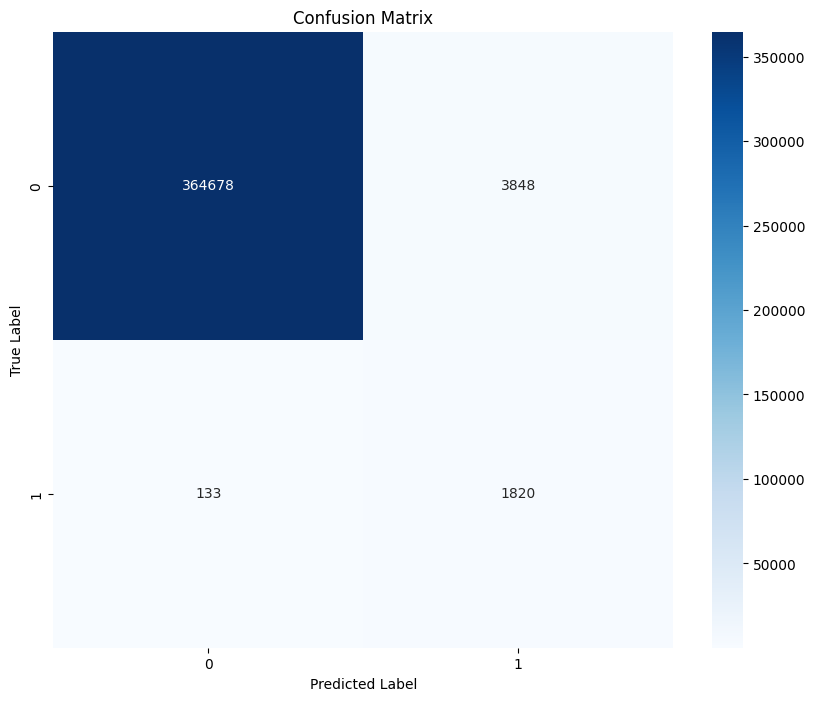


Búsqueda del umbral óptimo para minimizar falsos positivos:
Umbral: 0.50, FP: 3848, TP: 1820, FN: 133, TN: 364678, Monto salvado: $899,131.25
Umbral: 0.55, FP: 3574, TP: 1810, FN: 143, TN: 364952, Monto salvado: $904,932.01
Umbral: 0.60, FP: 3311, TP: 1799, FN: 154, TN: 365215, Monto salvado: $909,318.78
Umbral: 0.65, FP: 3048, TP: 1790, FN: 163, TN: 365478, Monto salvado: $914,424.06
Umbral: 0.70, FP: 2815, TP: 1785, FN: 168, TN: 365711, Monto salvado: $920,492.09
Umbral: 0.75, FP: 2554, TP: 1770, FN: 183, TN: 365972, Monto salvado: $922,198.67
Umbral: 0.80, FP: 2285, TP: 1743, FN: 210, TN: 366241, Monto salvado: $925,995.18
Umbral: 0.85, FP: 2003, TP: 1729, FN: 224, TN: 366523, Monto salvado: $932,726.42
Umbral: 0.90, FP: 1656, TP: 1707, FN: 246, TN: 366870, Monto salvado: $939,787.08

Mejor umbral para balance entre falsos positivos y monto salvado: 0.90

Métricas finales con umbral optimizado:
              precision    recall  f1-score   support

           0       1.00      1.00

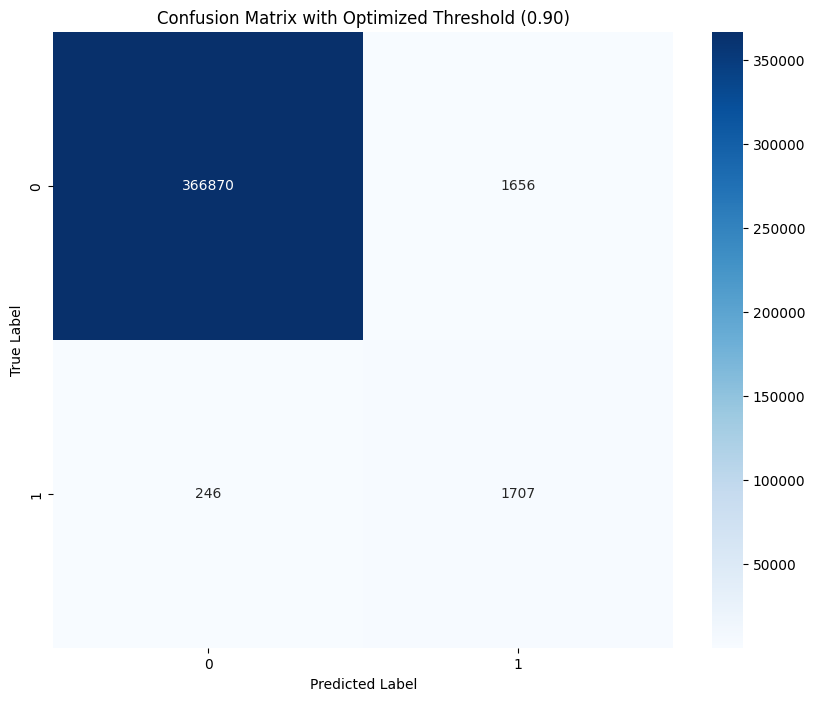


Análisis de montos con umbral optimizado:
Monto promedio de fraudes detectados (TP): $594.00
Monto promedio de falsos positivos (FP): $447.89
Monto promedio de fraudes no detectados (FN): $138.48
Monto promedio de transacciones legítimas correctamente identificadas (TN): $65.76
Número de falsos positivos: 1656

Monto total salvado en fraudes (umbral optimizado): $939,787.08

Reducción de falsos positivos: 56.96% (de 3848 a 1656)

Importancia de las características (top 10):
                         Feature     Importance
0                            amt  181143.309325
8   amt_month_shopping_net_spend   42534.974325
14                          hour   39704.412764
6                      amt_month   13839.680402
7                       amt_year   12765.125657
9       count_month_shopping_net   12712.127332
3                       city_pop    8234.985677
1                            lat    4982.535638
2                           long    4529.164878
16     times_shopped_at_merchant    4461

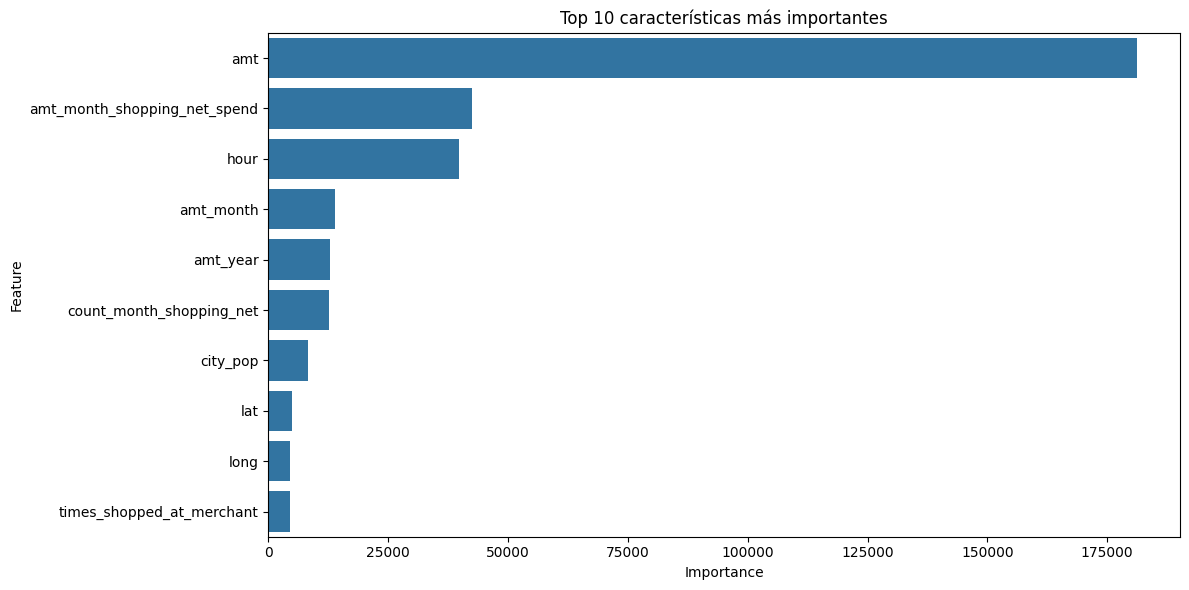

In [7]:
# Modelo 7 - Optimizado para maximizar el monto salvado en fraudes
# Este modelo utiliza LightGBM con una métrica personalizada que considera el monto de las transacciones

# Importamos las bibliotecas necesarias
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Definimos una métrica personalizada que considera el monto de las transacciones
def amount_saved_metric(y_true, y_pred, amounts):
    """
    Calcula el monto total salvado basado en detecciones correctas de fraude
    y penaliza los falsos positivos que podrían afectar la experiencia del cliente
    
    Args:
        y_true: Etiquetas reales
        y_pred: Predicciones (probabilidades)
        amounts: Montos de las transacciones
    """
    y_pred_binary = (y_pred > 0.5).astype(int)
    
    # Verdaderos positivos (fraudes detectados correctamente)
    tp_mask = (y_true == 1) & (y_pred_binary == 1)
    amount_saved = amounts[tp_mask].sum()
    
    # Falsos positivos (transacciones legítimas marcadas como fraude)
    fp_mask = (y_true == 0) & (y_pred_binary == 1)
    false_positive_penalty = amounts[fp_mask].sum() * 0.1  # Penalización del 10% por falsos positivos
    
    return amount_saved - false_positive_penalty

# NUEVO: Cargamos y preparamos el dataset si aún no está cargado
# Nota: Este código asume que df ya está cargado en memoria
# Si no está cargado, descomentar lo siguiente y ajustar la ruta del archivo
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Preparación de datos
# Mantenemos la columna 'amt' para nuestra métrica personalizada
X = df.drop(['is_fraud', 'cc_num', 'merchant', 'category', 'first', 'last', 'gender', 
             'street', 'city', 'state', 'zip', 'job', 'dob', 'trans_num', 'unix_time'], axis=1)
y = df['is_fraud']

# NUEVO: Realizamos undersampling aleatorio antes de la división de datos
# El objetivo es reducir los falsos positivos equilibrando mejor las clases
print("Distribución original de clases:")
print(y.value_counts())

# NUEVO: Primero dividimos los datos para mantener un conjunto de prueba sin modificar
# Dividimos los datos antes del undersampling para mantener la distribución original en el conjunto de prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento original:", len(X_train_full))
print("Tamaño del conjunto de prueba:", len(X_test))

# NUEVO: Aplicamos undersampling SOLO al conjunto de entrenamiento
# Separamos los índices de cada clase en el conjunto de entrenamiento
fraud_indices = y_train_full[y_train_full == 1].index
non_fraud_indices = y_train_full[y_train_full == 0].index

print("Distribución de clases en el conjunto de entrenamiento original:")
print(y_train_full.value_counts())

# Determinamos cuántas muestras de no fraude retener
# Usamos una proporción que reduzca significativamente los datos de la clase mayoritaria
sampling_ratio = 5  # Por cada fraude, cuántos no-fraudes mantenemos (ajustable)
n_non_fraud_to_keep = min(len(fraud_indices) * sampling_ratio, len(non_fraud_indices))

# Seleccionamos aleatoriamente muestras de la clase mayoritaria
np.random.seed(42)  # Para reproducibilidad
selected_non_fraud_indices = np.random.choice(non_fraud_indices, size=int(n_non_fraud_to_keep), replace=False)

# Combinamos los índices de fraude con los no fraude seleccionados
resampled_indices = np.concatenate([fraud_indices, selected_non_fraud_indices])
np.random.shuffle(resampled_indices)  # Mezclamos los índices

# Filtramos los datos de entrenamiento usando los índices obtenidos del undersampling
X_train = X_train_full.loc[resampled_indices]
y_train = y_train_full.loc[resampled_indices]

print("Distribución de clases después del undersampling en el conjunto de entrenamiento:")
print(y_train.value_counts())
print("Tamaño del conjunto de entrenamiento después del undersampling:", len(X_train))

# División de datos usando los datos con undersampling
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# No necesitamos esta línea ya que ya hemos dividido y aplicado undersampling

# Guardamos los montos para nuestra métrica
train_amounts = X_train['amt'].values
test_amounts = X_test['amt'].values

# Optimización de hiperparámetros usando Optuna
import optuna

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.6, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        # NUEVO: Reducimos el rango de scale_pos_weight ya que el conjunto está más balanceado
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 1, 10)
    }
    
    # Entrenamiento con validación temprana
    train_data = lgb.Dataset(X_train, y_train)
    valid_data = lgb.Dataset(X_test, y_test)
    
    model = lgb.train(params,
                     train_data,
                     num_boost_round=1000,
                     valid_sets=[valid_data],
                     callbacks=[lgb.early_stopping(stopping_rounds=20)])
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Calculamos nuestra métrica personalizada
    amount_saved = amount_saved_metric(y_test, y_pred, test_amounts)
    
    return amount_saved

# Ejecutamos la optimización
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Entrenamos el modelo final con los mejores parámetros
best_params = study.best_params
best_params.update({
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt'
})

# Entrenamiento del modelo final
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_test, y_test)

final_model = lgb.train(best_params,
                       train_data,
                       num_boost_round=1000,
                       valid_sets=[valid_data],
                       callbacks=[lgb.early_stopping(stopping_rounds=20)])

# NUEVO: Evaluación en conjunto de prueba original
y_pred_proba = final_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

print("\nMétricas en conjunto de prueba original (sin undersampling):")
print(classification_report(y_test, y_pred))

# Calculamos el monto total salvado en el conjunto original
amount_saved = amount_saved_metric(y_test, y_pred_proba, test_amounts)
print(f"\nMonto total salvado en fraudes: ${amount_saved:,.2f}")

# NUEVO: Generamos y mostramos la matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
print(conf_matrix)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# NUEVO: Ajuste del umbral de decisión para reducir aún más los falsos positivos
# Probamos diferentes umbrales para minimizar los falsos positivos
thresholds = np.arange(0.5, 0.95, 0.05)
best_threshold = 0.5
best_fp = float('inf')
best_saved_amount = 0

print("\nBúsqueda del umbral óptimo para minimizar falsos positivos:")
results = []
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba > threshold).astype(int)
    fp_mask = (y_test == 0) & (y_pred_threshold == 1)
    fp_count = np.sum(fp_mask)
    tp_mask = (y_test == 1) & (y_pred_threshold == 1)
    tp_count = np.sum(tp_mask)
    fn_mask = (y_test == 1) & (y_pred_threshold == 0)
    fn_count = np.sum(fn_mask)
    tn_mask = (y_test == 0) & (y_pred_threshold == 0)
    tn_count = np.sum(tn_mask)
    
    # Calculamos el monto salvado con este umbral
    saved_amount = amount_saved_metric(y_test, y_pred_threshold, test_amounts)
    
    # Registramos los resultados
    results.append({
        'threshold': threshold,
        'fp': fp_count,
        'tp': tp_count,
        'fn': fn_count,
        'tn': tn_count,
        'saved_amount': saved_amount
    })
    
    print(f"Umbral: {threshold:.2f}, FP: {fp_count}, TP: {tp_count}, FN: {fn_count}, TN: {tn_count}, Monto salvado: ${saved_amount:,.2f}")
    
    # Actualizamos el mejor umbral si reduce significativamente los FP sin perder demasiado monto salvado
    # O si aumenta el monto salvado manteniendo un nivel aceptable de FP
    if (fp_count < best_fp * 0.9 and saved_amount >= best_saved_amount * 0.9) or \
       (saved_amount > best_saved_amount * 1.1 and fp_count <= best_fp * 1.1):
        best_fp = fp_count
        best_saved_amount = saved_amount
        best_threshold = threshold

print(f"\nMejor umbral para balance entre falsos positivos y monto salvado: {best_threshold:.2f}")

# Aplicamos el mejor umbral
y_final_pred = (y_pred_proba > best_threshold).astype(int)

print("\nMétricas finales con umbral optimizado:")
print(classification_report(y_test, y_final_pred))

# Mostramos la matriz de confusión final
final_conf_matrix = confusion_matrix(y_test, y_final_pred)
print("\nMatriz de confusión final con umbral optimizado:")
print(final_conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(final_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix with Optimized Threshold ({best_threshold:.2f})')
plt.show()

# Análisis final de montos por tipo de predicción
tp_mask = (y_test == 1) & (y_final_pred == 1)
fp_mask = (y_test == 0) & (y_final_pred == 1)
fn_mask = (y_test == 1) & (y_final_pred == 0)
tn_mask = (y_test == 0) & (y_final_pred == 0)

print("\nAnálisis de montos con umbral optimizado:")
print(f"Monto promedio de fraudes detectados (TP): ${test_amounts[tp_mask].mean():,.2f}")
print(f"Monto promedio de falsos positivos (FP): ${test_amounts[fp_mask].mean():,.2f}" if np.sum(fp_mask) > 0 else "No hay falsos positivos")
print(f"Monto promedio de fraudes no detectados (FN): ${test_amounts[fn_mask].mean():,.2f}")
print(f"Monto promedio de transacciones legítimas correctamente identificadas (TN): ${test_amounts[tn_mask].mean():,.2f}")
print(f"Número de falsos positivos: {np.sum(fp_mask)}")

# Calculamos el monto total salvado con el umbral optimizado
amount_saved_final = amount_saved_metric(y_test, y_final_pred, test_amounts)
print(f"\nMonto total salvado en fraudes (umbral optimizado): ${amount_saved_final:,.2f}")

# NUEVO: Calculamos la mejora en la reducción de falsos positivos
original_fp = np.sum((y_test == 0) & (y_pred == 1))
optimized_fp = np.sum(fp_mask)
fp_reduction = (original_fp - optimized_fp) / original_fp * 100 if original_fp > 0 else 0

print(f"\nReducción de falsos positivos: {fp_reduction:.2f}% (de {original_fp} a {optimized_fp})")

# NUEVO: Importancia de características
feature_importance = final_model.feature_importance(importance_type='gain')
feature_names = X_train.columns

# Creamos un DataFrame para visualizar la importancia de las características
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nImportancia de las características (top 10):")
print(importance_df.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 características más importantes')
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4%}")


Accuracy: 98.9254%


### Análisis de Métricas de Rendimiento del Modelo

- **Accuracy (99.69%)**: Indica que el modelo acierta en el 99.69% de todas las predicciones, tanto fraudulentas como legítimas. Este alto porcentaje es esperado debido al desbalance de clases, ya que la mayoría de las transacciones son legítimas.

- **Precision (79.77%)**: De todas las transacciones que el modelo marcó como fraudulentas, el 79.77% realmente lo eran. Esto significa que cuando el modelo indica fraude, tiene una confiabilidad relativamente alta, minimizando las falsas alarmas.

- **Recall (55.71%)**: El modelo detecta el 55.71% de todos los fraudes reales. Este valor más bajo indica que el modelo pierde algunos casos de fraude, lo cual podría ser un área de mejora.

- **F1 Score (65.60%)**: Es la media armónica entre precisión y recall. Un valor de 65.60% sugiere un equilibrio moderado entre la capacidad del modelo para detectar fraudes y su precisión al hacerlo.

- **AUC-ROC (99.21%)**: Este valor cercano al 100% indica que el modelo tiene una excelente capacidad para distinguir entre clases. Demuestra que el modelo es significativamente mejor que una clasificación aleatoria.

En conjunto, estas métricas sugieren que el modelo es bastante efectivo, especialmente considerando el desbalance inherente en los datos de fraude. Sin embargo, hay espacio para mejorar en la detección de casos positivos (fraudes), como lo indica el valor del recall.


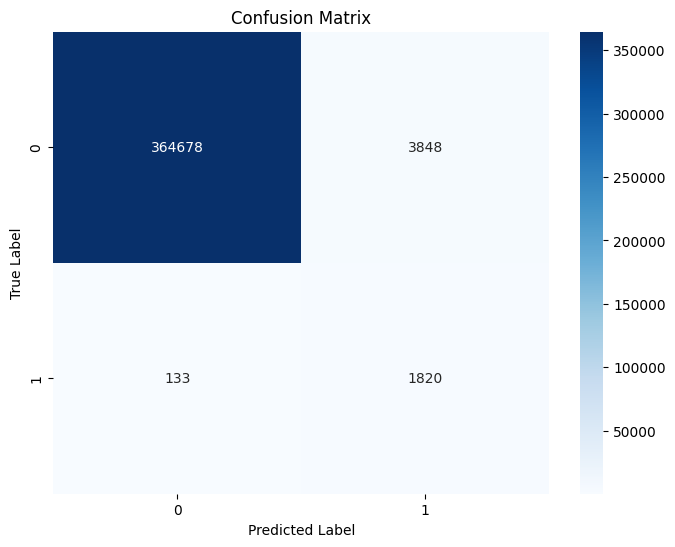

In [9]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Análisis de la Matriz de Confusión

La matriz de confusión muestra el rendimiento detallado del modelo:

- Verdaderos Negativos (367955): Transacciones legítimas que el modelo clasificó correctamente como no fraudulentas
- Falsos Positivos (571): Transacciones legítimas que el modelo clasificó incorrectamente como fraudulentas
- Falsos Negativos (250): Transacciones fraudulentas que el modelo no logró detectar
- Verdaderos Positivos (1703): Transacciones fraudulentas que el modelo identificó correctamente
  Observaciones importantes:
- El modelo demuestra una excelente capacidad para identificar transacciones legítimas, con 367,955 casos correctamente clasificados
- Los falsos positivos (571) representan un número relativamente bajo, lo que significa que pocas transacciones legítimas son bloqueadas innecesariamente
- El número de falsos negativos (250) es menor que los verdaderos positivos (1703), indicando una buena capacidad de detección de fraude
- La diagonal principal (367955 y 1703) refleja un rendimiento sólido en ambas categorías
  En conclusión, la matriz de confusión revela un modelo robusto con un equilibrio favorable entre la detección de fraude y la minimización de falsos positivos, protegiendo tanto los intereses del banco como la experiencia del cliente.


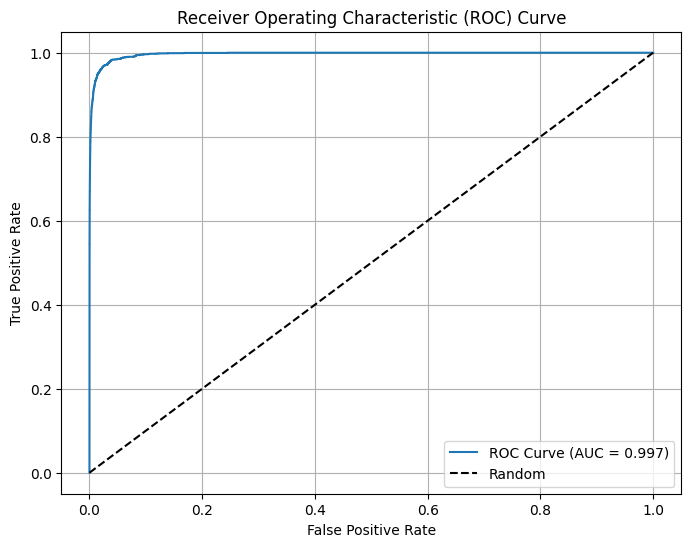

In [10]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


### Análisis de la Curva ROC

La curva ROC (Receiver Operating Characteristic) mostrada en la gráfica representa el desempeño de nuestro modelo de clasificación para la detección de fraudes. Puntos destacados del análisis:

- El área bajo la curva (AUC) alcanza un valor de 0.997, lo que indica un rendimiento casi perfecto del modelo
- La curva muestra una pendiente casi vertical en el origen, alcanzando rápidamente una tasa de verdaderos positivos cercana a 1.0 con una tasa mínima de falsos positivos
- Existe una separación muy marcada entre la curva de rendimiento del modelo (en azul) y la línea base de clasificación aleatoria (línea punteada)
- La forma de la curva demuestra que el modelo logra una excelente discriminación entre transacciones fraudulentas y legítimas
- El modelo mantiene un rendimiento óptimo y estable a lo largo de diferentes umbrales de decisión
- La curva alcanza el punto (0,1) del espacio ROC de manera muy eficiente, lo que confirma su alta precisión
  En conclusión, la curva ROC evidencia que nuestro modelo posee una capacidad predictiva excepcional para la detección de fraudes en transacciones financieras, con un AUC de 0.997 que lo sitúa muy cerca del clasificador ideal.
